In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
data=pd.read_csv('/content/Crop_recommendation.csv')

In [4]:
print('The shape of dataset of ',data.shape)

The shape of dataset of  (2200, 8)


In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
# Calculate the mean of each feature
means = data.mean()

# Print the means
for feature, mean in means.items():
    print(f"Mean of {feature}: {mean:.2f}")


Mean of N: 50.55
Mean of P: 53.36
Mean of K: 48.15
Mean of temperature: 25.62
Mean of humidity: 71.48
Mean of ph: 6.47
Mean of rainfall: 103.46


<ipython-input-12-1fa63db6cc6d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data.mean()


In [14]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    z = data.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
        print('Minimum', i, 'required', x[i].min())
        print('Average', i, 'required', x[i].mean())
        print('Maximum', i, 'required', x[i].max())
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [17]:
@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']):
    # for condition in conditions:
        print(f"Average value for {conditions}:")
        grouped = data.groupby('label')[conditions].mean()
        for label, average in grouped.items():
            print(f"  {label}: {average:.2f}")
        print("--------------------------------------------")

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'r…

In [19]:
@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']):
  print("crops which require greater than average",conditions,'\n')
  print(data[data[conditions]>data[conditions].mean()]['label'].unique())
  print('-----------------------------')
  print("crops which require lesser than average",conditions,'\n')
  print(data[data[conditions]<data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'r…

<ipython-input-21-b07ae1f63f63>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], color='blue')
<ipython-input-21-b07ae1f63f63>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], color='blue')
<ipython-input-21-b07ae1f63f63>:13: UserWarning: 

`distplot` is a depreca

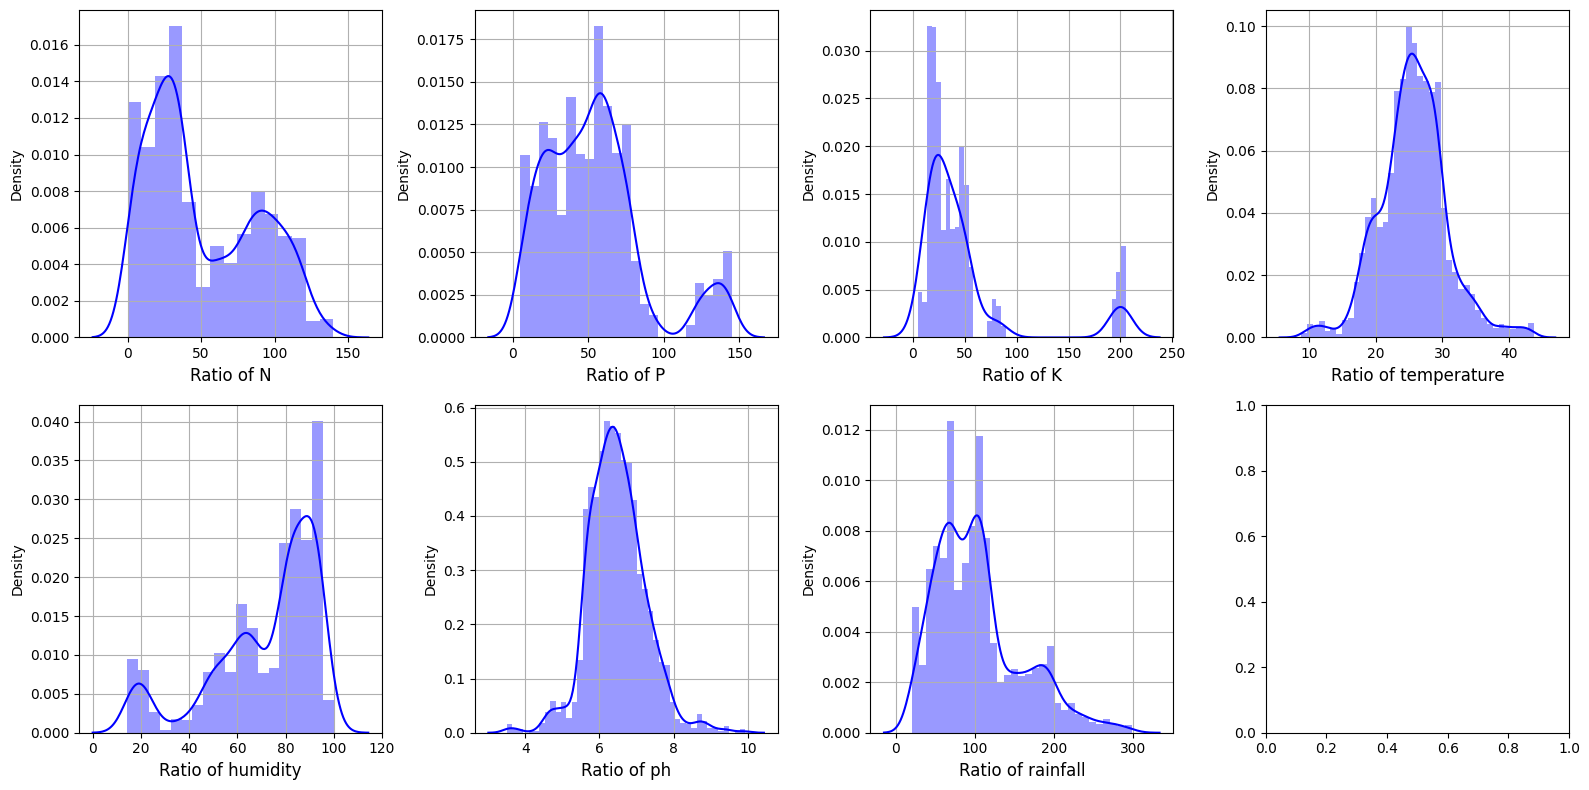

In [21]:
# Define the features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create subplots for each feature
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Iterate over the features
for i, feature in enumerate(features):
    # Select the current subplot
    plt.subplot(2, 4, i+1)

    # Plot the distribution plot
    sns.distplot(data[feature], color='blue')

    # Set x-label and grid for the subplot
    plt.xlabel(f'Ratio of {feature}', fontsize=12)
    plt.grid()

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
print('crops which require a very high ratio of Nitrogen content in soil:', data[data['N'] > 120]['label'].unique())
print('crops which require a very high ratio of Phosphorus content in soil:', data[data['P'] > 100]['label'].unique())
print('crops which require a very high ratio of Potassium content in soil:', data[data['K'] > 200]['label'].unique())
print('crops which require very high rainfall:', data[data['rainfall'] > 200]['label'].unique())
print('crops which require very low temperature:', data[data['temperature'] < 10]['label'].unique())
print('crops which require very high temperature:', data[data['temperature'] > 40]['label'].unique())
print('crops which require very low humidity:', data[data['humidity'] < 20]['label'].unique())
print('crops which require very low pH:', data[data['ph'] < 4]['label'].unique())
print('crops which require very high pH:', data[data['ph'] > 9]['label'].unique())


crops which require a very high ratio of Nitrogen content in soil: ['cotton']
crops which require a very high ratio of Phosphorus content in soil: ['grapes' 'apple']
crops which require a very high ratio of Potassium content in soil: ['grapes' 'apple']
crops which require very high rainfall: ['rice' 'papaya' 'coconut']
crops which require very low temperature: ['grapes']
crops which require very high temperature: ['grapes' 'papaya']
crops which require very low humidity: ['chickpea' 'kidneybeans']
crops which require very low pH: ['mothbeans']
crops which require very high pH: ['mothbeans']


In [25]:
print('Summer Crops:', data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print('Winter Crops:', data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print('Rainy Crops:', data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


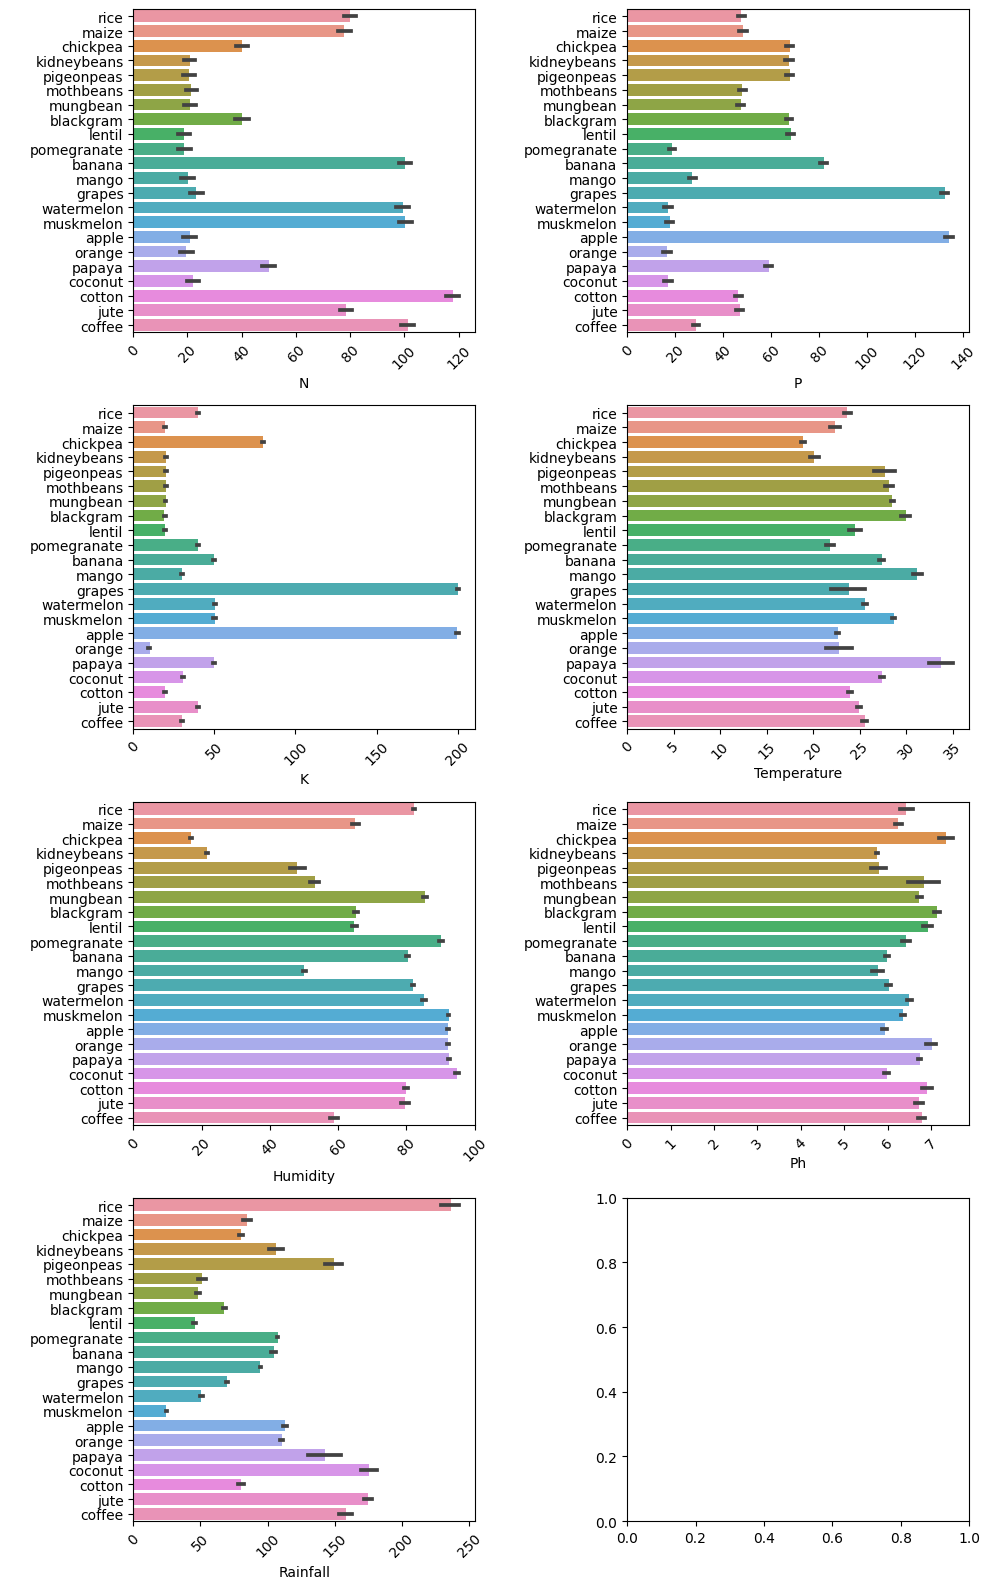

In [42]:
num_features = len(features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows*4))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.barplot(x=data[feature], y=data['label'], ax=axes[row, col])
    axes[row, col].set_ylabel(' ')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [26]:
#Determine Optimum number of cluster by elbow method
from sklearn.cluster import KMeans

x=data.drop(['label'],axis=1)
x=x.values
print(x.shape)

(2200, 7)


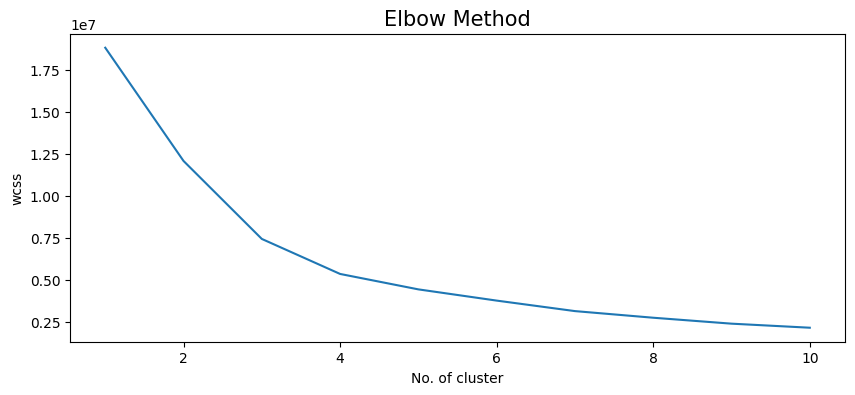

In [27]:

plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()

In [28]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})

In [29]:
for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------------------------')

Crops is cluster 0 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------------------
Crops is cluster 1 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------------------
Crops is cluster 2 ['grapes' 'apple']
---------------------------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------------------------


In [43]:
y=data['label']
x=data.drop(['label'],axis=1)

print('shape of x',x.shape)
print('shape of y',y.shape)

shape of x (2200, 7)
shape of y (2200,)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (1760, 7)
Shape of x_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


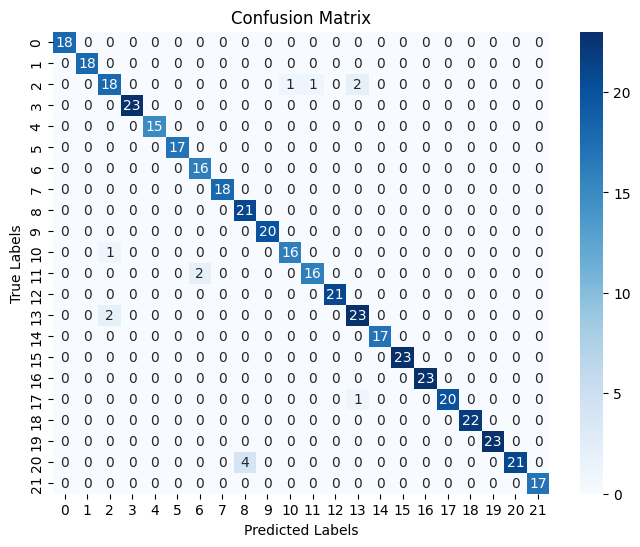

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer,classification_report

conf_matrix = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [52]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [53]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [55]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The suggested crop for given climatic condition is",prediction)

The suggested crop for given climatic condition is ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
